In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('df.csv', index_col= 0)

In [3]:
df.sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
259696,730561,Canada,British Columbia,Vancouver,V1E 4R6,Female,College,66731.38,Married,Star,2480.39,Standard,2018,7,9999,0,2018,5,0,0,0,0,0.0,0,0
210466,233437,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,59410.00,Divorced,Nova,9918.70,Standard,2017,8,2018,4,2017,11,13,0,13,1417,141.0,0,0
171564,547764,Canada,Alberta,Calgary,T3E 2V9,Male,Bachelor,84745.00,Married,Nova,5912.78,Standard,2013,5,2014,7,2018,1,0,0,0,0,0.0,0,0
162683,526765,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,62237.00,Married,Nova,5443.76,Standard,2017,3,9999,0,2017,12,1,1,2,3554,355.0,0,0
6676,723262,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,74964.00,Married,Star,4362.93,Standard,2018,10,9999,0,2017,5,0,0,0,0,0.0,0,0


## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [4]:
df_reservas_mensuales = df.groupby('month')['flights_booked'].sum().reset_index()

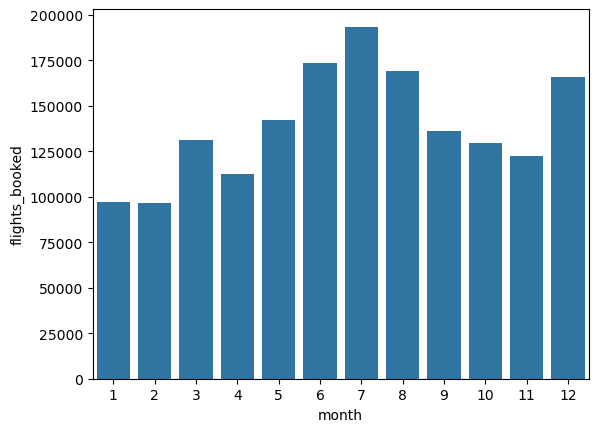

In [5]:
sns.barplot(
    data=df_reservas_mensuales,
    x='month',
    y='flights_booked');

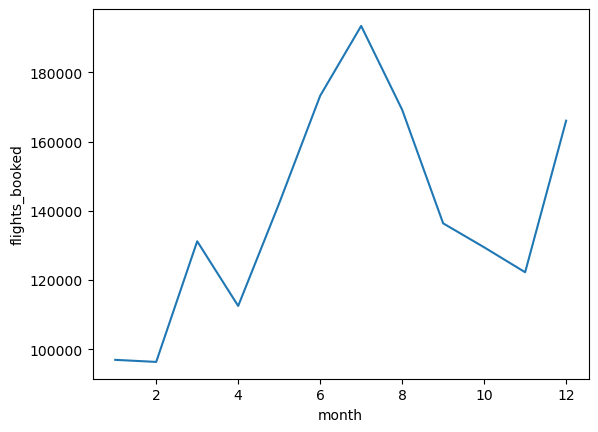

In [6]:
sns.lineplot(
    data=df_reservas_mensuales,
    x='month',
    y='flights_booked'
);

Vemos que hay una subida significativa de reservas entre abril y julio. A partir de este mes bajan, para luego volver a subir entre noviembre y diciembre, seguramente por fechas navideñas

## ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

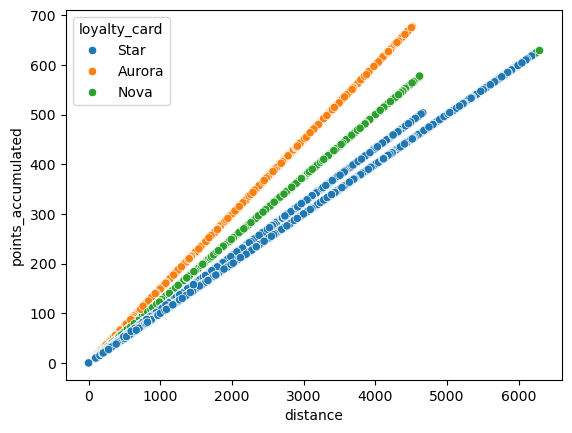

In [7]:
sns.scatterplot(
    data=df,
    x='distance',
    y='points_accumulated',
    hue= 'loyalty_card');

vemos que claramente hay una relación clara entre la distancia volada y los puntos acumulados, siendo que cuantas mas millas/km se recorren, más puntos se acumulan. Las distintas líneas que vemos se deben a que la compañia utiliza distintos niveles de membresía, porque, si se tiene un nivel de membresía mas bajo, aunque se vuele más, los puntos van a ser menos que los de alguien con un nivel de membresía mas alto

## ¿Cuál es la distribución de los clientes por provincia o estado?

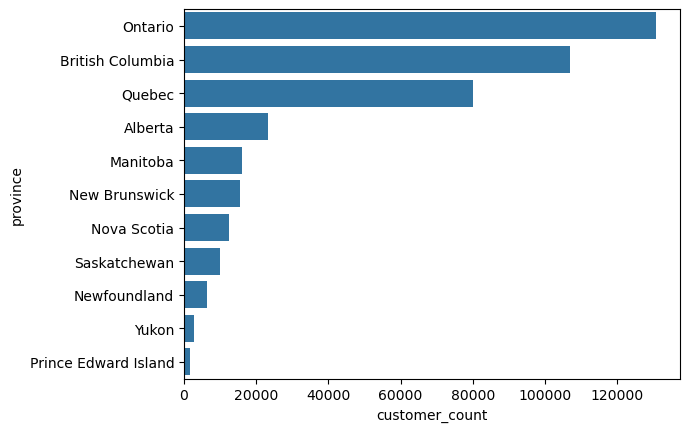

In [8]:
df_distribucion = df['province'].value_counts().reset_index() # .value_counts() cuenta la frecuencia y .reset_index() la prepara para Seaborn
df_distribucion.columns = ['province', 'customer_count'] # Nombrar las columnas

sns.barplot(
    data=df_distribucion,
    x='customer_count', 
    y='province');


Aqui vemos que el mayor numero de clientes se encuentran en Ontario, mientras que el menor se encuentra en PrinceEdward Island.

## ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [9]:
education = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'] #definimos las columnas que tienen que aparecer

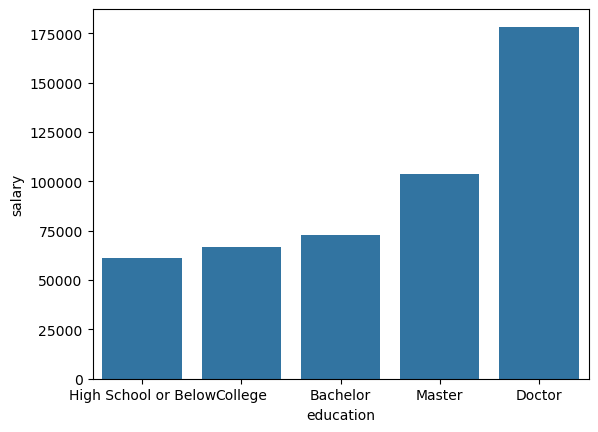

In [10]:
# Calcular el salario promedio por educación
df_salario_promedio = df.groupby('education')['salary'].mean().reindex(education).reset_index()

sns.barplot(
    data=df_salario_promedio,
    x='education',
    y='salary');

In [11]:
#buscamos la varianza de sueldo por educacion
# 1. Calcular la Desviación Estándar (std) del salario por nivel educativo
df_std_salary = df.groupby('education')['salary'].std().sort_values(ascending=False).reset_index()

# 2. Calcular la Varianza (var) del salario por nivel educativo
df_var_salary = df.groupby('education')['salary'].var().sort_values(ascending=False).reset_index()

print("📈 Desviación Estándar (Std) del Salario por Nivel Educativo:")
display(df_std_salary)

print("\n")

print("📉 Varianza (Var) del Salario por Nivel Educativo:")
df_var_salary

📈 Desviación Estándar (Std) del Salario por Nivel Educativo:


,education,salary
0,Doctor,70307.642502
1,Master,17514.343573
2,Bachelor,16670.286198
3,High School or Below,12105.086402
4,College,0.000000




📉 Varianza (Var) del Salario por Nivel Educativo:


,education,salary
0,Doctor,4.943165e+09
1,Master,3.067522e+08
2,Bachelor,2.778984e+08
3,High School or Below,1.465331e+08
4,College,0.000000e+00


<Axes: xlabel='salary'>

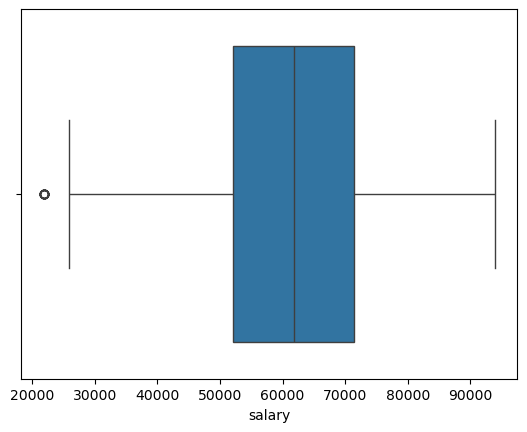

In [12]:
sns.boxplot(
    data=df.query("education == 'High School or Below'"),
    x='salary'
    )


<Axes: xlabel='salary'>

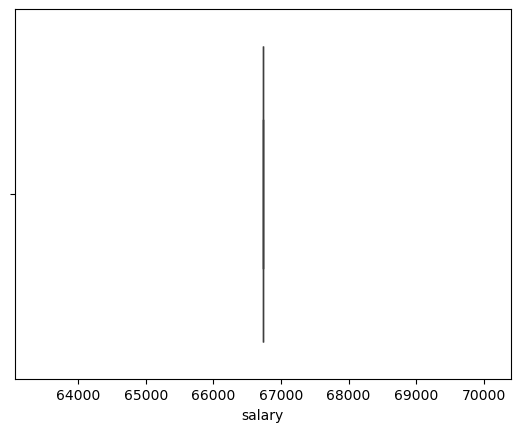

In [13]:
sns.boxplot(
    data=df.query("education == 'College'"),
    x='salary'
    )

<Axes: xlabel='salary'>

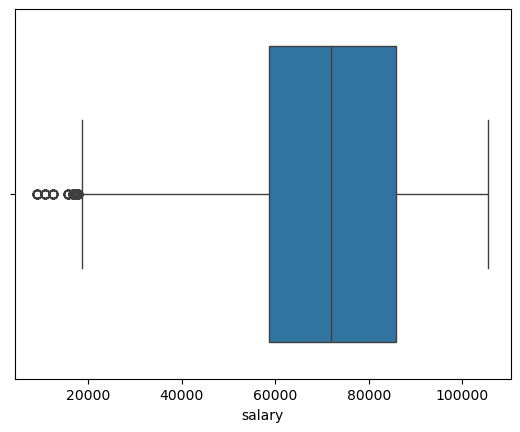

In [14]:
sns.boxplot(
    data=df.query("education == 'Bachelor'"),
    x='salary'
    )

Nos llama la atención que en el salario de Bachelor, hay un numero notable de outliers. Investigaremos para saber a que nos puede llevar esto.

<Axes: xlabel='salary'>

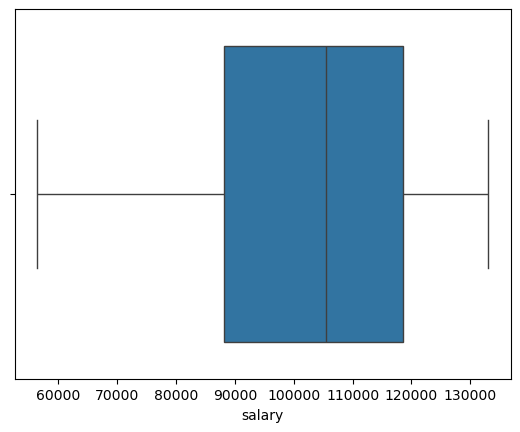

In [15]:
sns.boxplot(
    data=df.query("education == 'Master'"),
    x='salary'
    )

<Axes: xlabel='salary'>

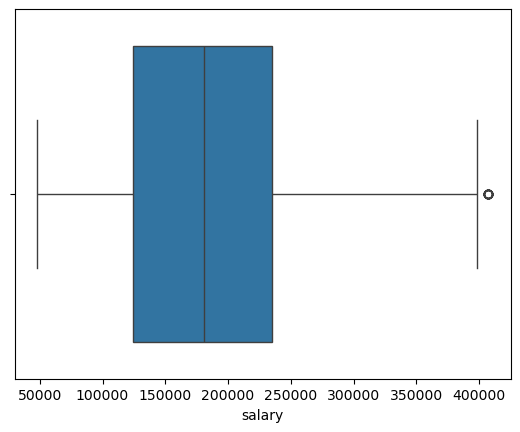

In [16]:
sns.boxplot(
    data=df.query("education == 'Doctor'"),
    x='salary'
    )

hay una clara relación entre el nivel educativo y el salario. Cuanto mayor es este, mayor es el sueldo

### ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [17]:
df_cont_tarjetas = df.groupby("loyalty_card")["loyalty_number"].count().reset_index()
df_cont_tarjetas

,loyalty_card,loyalty_number
0,Aurora,83832
1,Nova,137568
2,Star,184224


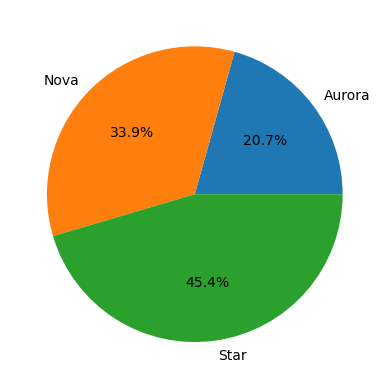

In [18]:
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_cont_tarjetas, 
        autopct=  '%1.1f%%');

la mayor parte de las tarjetas son del tipo Star. No hay una diferencia extrema entre los tipo de tarjetas

#### NEXT STEP -- averiguar la relación entre el nivel adquisitivo y el tipo de tarjeta de fidelidad

## ¿Cómo se distribuyen los clientes según su estado civil y género?

In [19]:
#agrupamos para ver la frecuencia de las dos columnas
df_mar_gen = df.groupby(['marital_status', 'gender']).size().reset_index(name='Customer_Count')


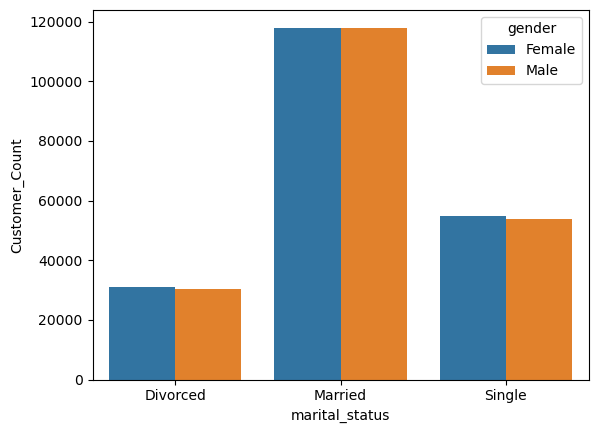

In [20]:
sns.barplot(
    data = df_mar_gen,
    x='marital_status',
    y='Customer_Count',
    hue='gender');

en genral, no hay mucha diferencia entre mujeres y hombres, sin embargo, si que se obseerva que la mayoria de los clientes estan casados.

## ¿Hay alguna relación entre la ciudad del pasajero y los vuelos reservados?

In [21]:
# 1. Agrupar por provincia y sumar el total de vuelos reservados
df_vuelos_por_provincia = df.groupby('province')['flights_booked'].sum().reset_index()

df_vuelos_por_provincia = df_vuelos_por_provincia.sort_values(by='flights_booked', ascending=False)

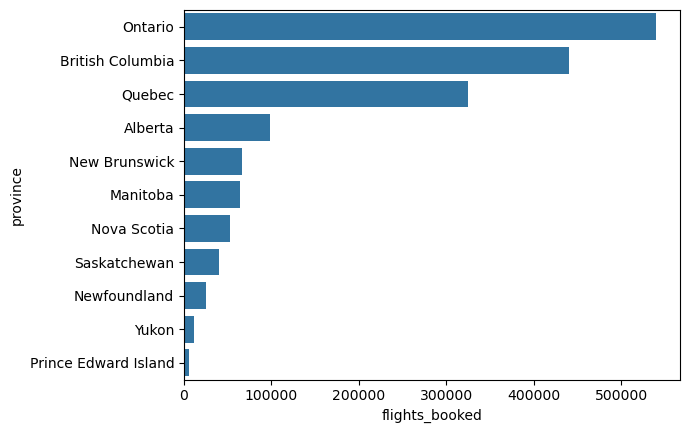

In [22]:
sns.barplot(
    data=df_vuelos_por_provincia,
    x='flights_booked',
    y='province',
    order=df_vuelos_por_provincia['province']); # Asegura el orden descendente

Ontario sigue siendo la Provincia que mas vuelos reserva